## Analysis of photons in LAr
In this notebook, we aim to analyse the dynamics of photons (gamma) in liquid argon (LAr).
These particles are extremely interesting in our study because they are largely emitted by de-excitation of Ar41. However, in the current simulated data, this process doesn't occur. Then, the analysis concern the gamma emitted by other processes (e.g. de-excitation of other atoms).

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 30})

# load data and show only meaningful fields
fields = ["PID", "tracknumber", "ParentTrackID", "energydeposition", "kineticenergy", "time", "x", "y", "z", "eventnumber", "parentnucleusPID", "creatorprocess"]
filepath = os.path.join("..", "Data", "output123456789.csv")
df = pd.read_csv(filepath, index_col=False)[fields]
df.head()

,PID,tracknumber,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,parentnucleusPID,creatorprocess
0,13,1,0,5375.22,279243000.0,53.5999,1139.06,1065.57,1950.00,0,0,None
1,13,1,0,4200.84,279238000.0,53.6688,1139.06,1065.58,1921.16,0,0,None
2,13,1,0,4811.86,279233000.0,53.7515,1139.05,1065.58,1900.49,0,0,None
3,13,1,0,2344.09,279227000.0,53.7971,1139.04,1065.59,1875.69,0,0,None
4,13,1,0,8229.72,279218000.0,53.9409,1139.04,1065.59,1862.05,0,0,None


To track the gammas, we proceed as follows:
- we select the event with lowest number of gammas' entries, so that the track of gammas results easy.
- we select a gamma with more than 1 entry to see how it moves and interact with other particles.

In [13]:
gammas = df[df.PID==22]
print("First events ordered by number of gammas entries:\n{}".format(gammas.groupby("eventnumber").PID.count().sort_values().head()))
event = df[df.eventnumber==45].sort_values("time")
df[df.energydeposition>0].PID.unique()

First events ordered by number of gammas entries:
eventnumber
45    47
21    50
71    69
72    71
92    72
Name: PID, dtype: int64


array([        13,         11,         22,        -11, 1000180380,
       1000180400, 1000180390, 1000190390, 1000180360, 1000180410,
       1000190419, 1000190410, 1000180370, 1000170370, 1000160360,
       1000020040])

Now, we select the gamma with tracknumber `354` because it presents a few entries.

In [14]:
gamma354 = event[(event.PID==22) & (event.tracknumber==354)]
gamma354

,PID,tracknumber,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,parentnucleusPID,creatorprocess
122286,22,354,129,0.0000,713.8100,57.7783,-85.7999,-293.264,926.881,45,0,eBrem
122287,22,354,129,0.0000,457.2240,58.3169,27.7428,-326.264,697.572,45,0,eBrem
122288,22,354,129,0.0000,262.3700,58.4423,61.1521,-325.837,539.586,45,0,eBrem
122289,22,354,129,0.0000,204.1090,58.4946,39.9204,-340.161,512.071,45,0,eBrem
122290,22,354,129,0.0000,149.6130,59.4088,27.0640,-331.325,513.747,45,0,eBrem
122291,22,354,129,0.0000,98.7354,59.7196,-134.4740,-390.733,727.006,45,0,eBrem
122292,22,354,129,0.0000,93.9022,59.8525,-134.1520,-482.719,712.172,45,0,eBrem
122293,22,354,129,0.0000,91.3460,59.9536,-141.2480,-456.816,741.610,45,0,eBrem
122294,22,354,129,0.0000,85.1101,59.9901,-165.2740,-442.603,753.409,45,0,eBrem
122295,22,354,129,0.0000,65.0849,60.0186,-169.2410,-433.792,758.564,45,0,eBrem


During the simulation, the gamma `354` interacts with other particles, changing its kinetic energy (KE).
To understand what happens in those step, we look for the particles forced by the gamma `354`: these are **electrons** produced by **Compton scattering**.

In [15]:
scatterElectrons = event[(event.ParentTrackID==354)]
scatterElectrons

,PID,tracknumber,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,parentnucleusPID,creatorprocess
122307,11,551,354,41.93590,0.0,57.7784,27.7428,-326.264,697.572,45,0,compt
122306,11,552,354,256.58600,0.0,58.3178,61.1521,-325.837,539.586,45,0,compt
122305,11,553,354,194.85400,0.0,58.4429,39.9204,-340.161,512.071,45,0,compt
122304,11,554,354,58.26050,0.0,58.4948,27.0640,-331.325,513.747,45,0,compt
122303,11,555,354,54.49630,0.0,59.4089,-134.4740,-390.733,727.006,45,0,compt
122302,11,556,354,50.87770,0.0,59.7197,-134.1520,-482.719,712.172,45,0,compt
122301,11,557,354,4.83314,0.0,59.8525,-141.2480,-456.816,741.610,45,0,compt
122300,11,558,354,2.55625,0.0,59.9536,-165.2740,-442.603,753.409,45,0,compt
122299,11,559,354,6.23584,0.0,59.9901,-169.2410,-433.792,758.564,45,0,compt
122298,11,560,354,20.02520,0.0,60.0186,-176.1700,-429.345,756.326,45,0,compt


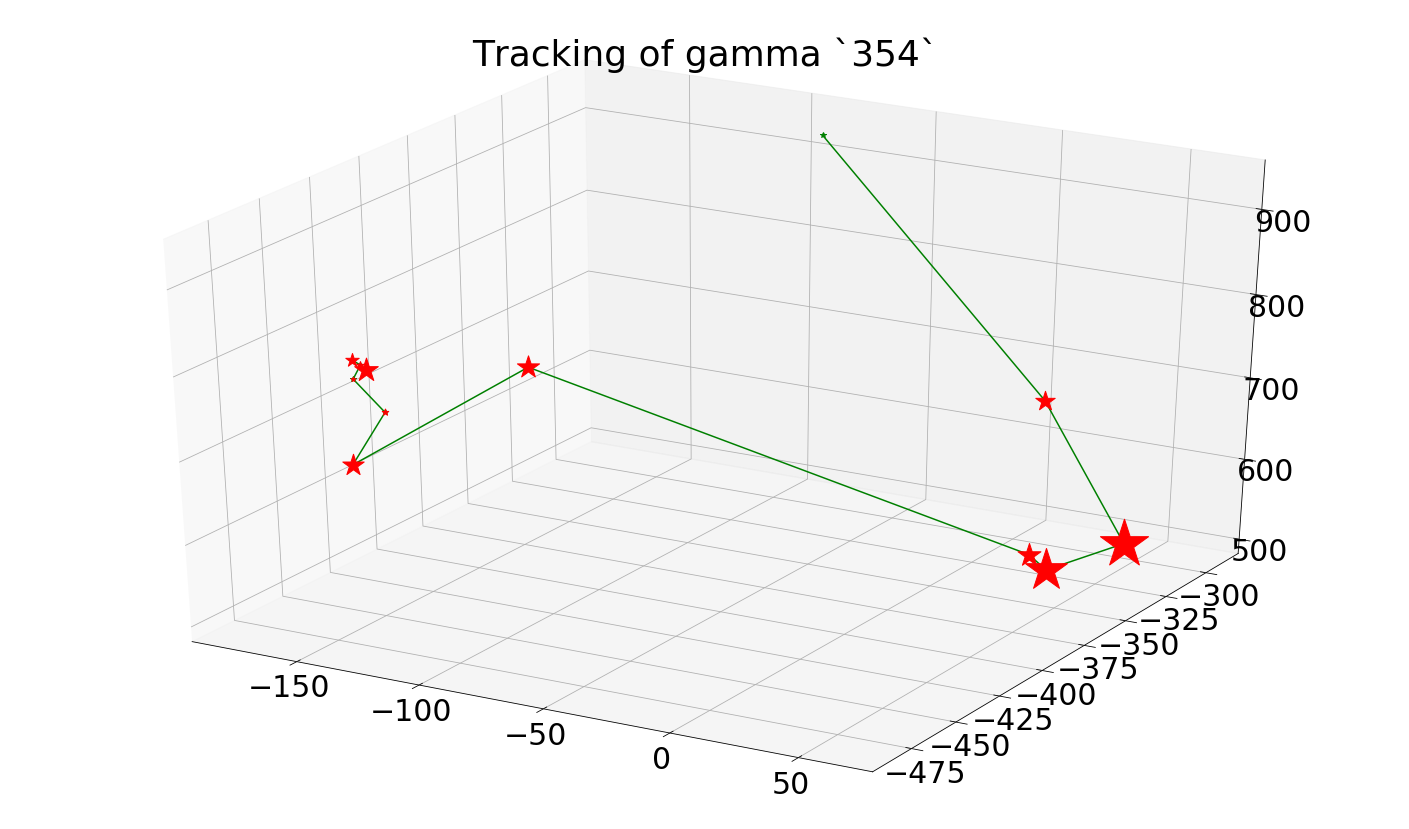

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(gamma354.x, gamma354.y, gamma354.z, c='g', marker='*')
for e in scatterElectrons.tracknumber.unique():
    elect = scatterElectrons[scatterElectrons.tracknumber == e][["x", "y", "z", "energydeposition"]]    
    x,y,z =elect.x, elect.y, elect.z
    ax.scatter(x, y, z, c='r', marker='*', s=10*elect.energydeposition)
plt.title("Tracking of gamma `354`")
plt.show()

In the plot above, we report the gamma trajectory (*green line*). We notice that it changes direction in occurrence of scattering of electrons (*red markers*) that deposit a certain amount of energy (*size of red marker*). Finally, the gamma deposit its energy (*green star*) when reach the volume border.

### Claim: the gamma depositions occur on the LAr border
We try to verify if the gamma deposition always occur in the border of the LAr volume. 
From the notebook "cj_grometry", we notice that the LAr volume is *1.95x1.95x1.95m*. Then we expect to verify this correspondance in the coordinate of gamma depositions.

abx          1141
aby          1141
abz          1141
max_coord    1141
dtype: int64


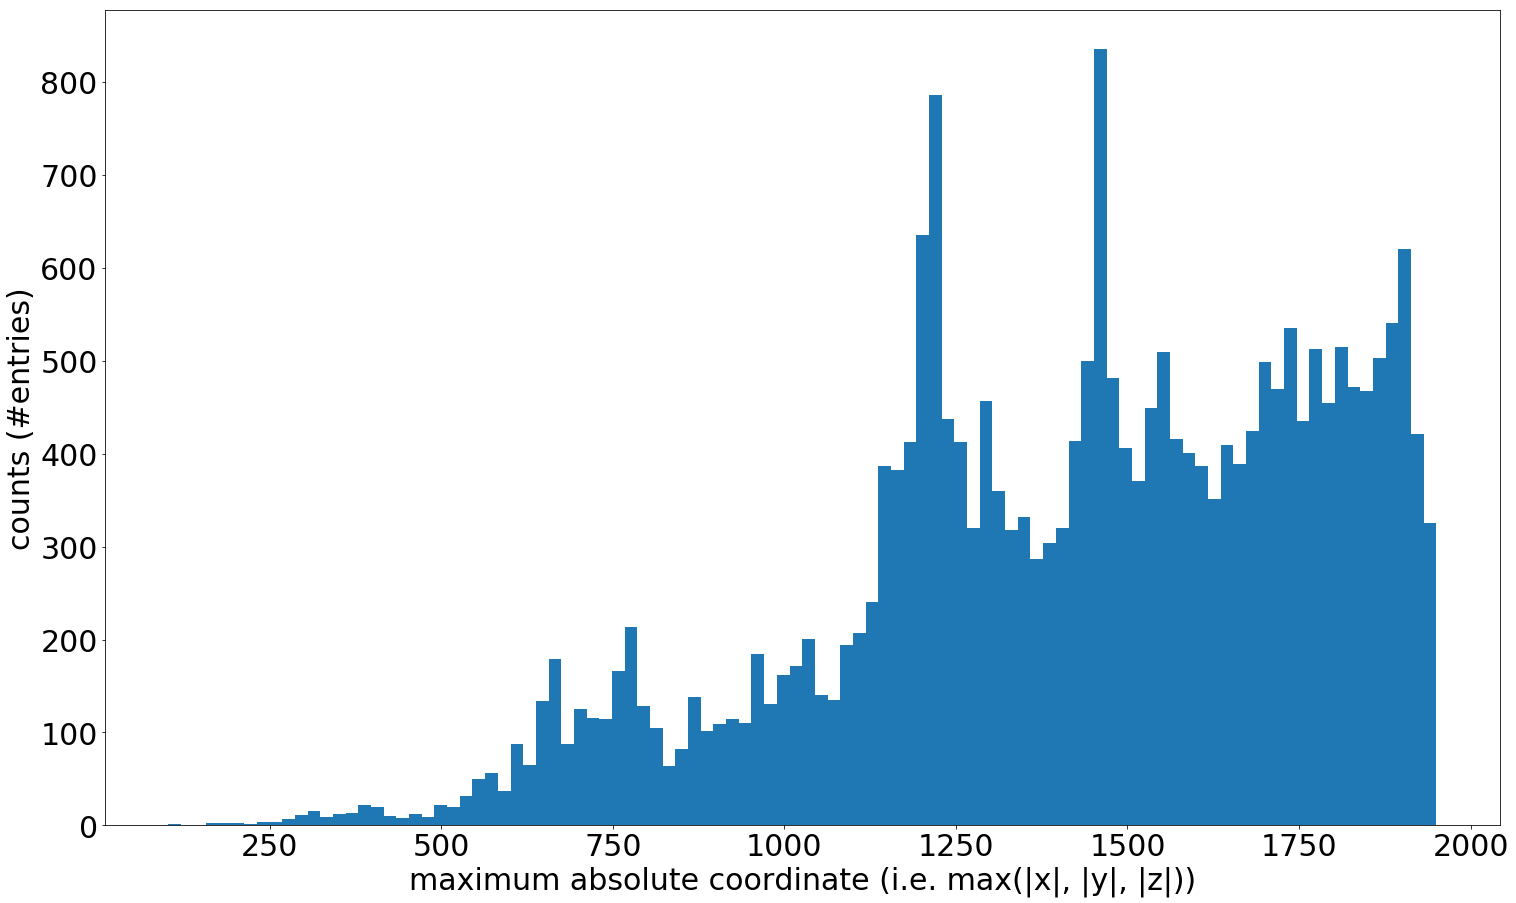

,PID,tracknumber,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,parentnucleusPID,creatorprocess,abx,aby,abz,max_coord
674,22,507,119,3.2063,0.0,54.4790,1107.30,1237.46,1867.99,0,0,eBrem,1107.30,1237.46,1867.99,1867.99
681,22,506,119,3.2063,0.0,54.0332,1131.82,1087.86,1862.42,0,0,eBrem,1131.82,1087.86,1862.42,1862.42
685,22,504,128,3.2063,0.0,54.6133,1138.94,1063.59,1617.94,0,0,eBrem,1138.94,1063.59,1617.94,1617.94
687,22,503,502,3.2063,0.0,55.5307,1148.01,1065.35,1347.67,0,0,eBrem,1148.01,1065.35,1347.67,1347.67
692,22,501,140,3.2063,0.0,56.1132,1213.86,1054.03,1339.57,0,0,eBrem,1213.86,1054.03,1339.57,1339.57


In [52]:
gamma_dep = df[(df.PID==22) & (df.energydeposition>0)]
data = {"abx": gamma_dep["x"].abs(), "aby": gamma_dep["y"].abs(), "abz": gamma_dep["z"].abs()}
abs_gamma = pd.DataFrame(data)
abs_gamma["max_coord"] = abs_gamma.max(1)
print(abs_gamma[abs_gamma.max_coord > 1900].count())

plt.hist(abs_gamma.max_coord, 100)
plt.xlabel("maximum absolute coordinate (i.e. max(|x|, |y|, |z|))")
plt.ylabel("counts (#entries)")
plt.show()

abs_gamma.max_coord.describe()
gamma_dep = pd.concat([gamma_dep, abs_gamma], axis=1)
gamma_dep.head()

The above claim has been disconfirmed because most of the photons don't deposit their energy in proximity of the volume border.

In fact, considering ~24k energy deposition from gammas, only ~1k gammas deposit energy with dominant absolute coordinate > 1900. All the rest?

**gamma releases energy in the Ge?**

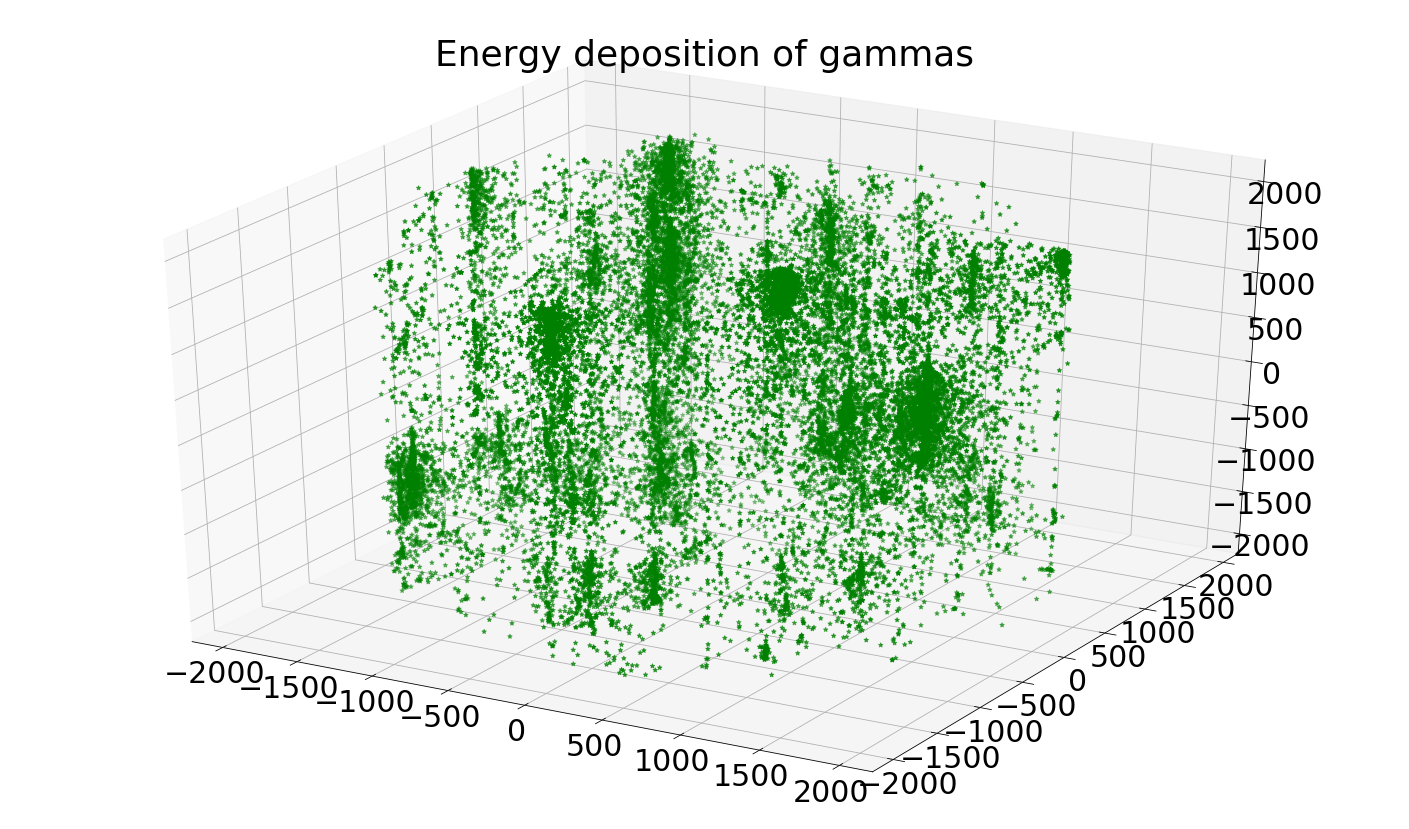

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma_dep.x, gamma_dep.y, gamma_dep.z, c='g', marker='*')
plt.title("Energy deposition of gammas")
plt.show()

In [56]:
print(gamma_dep[gamma_dep.max_coord < 1900].creatorprocess.unique())
print(gamma_dep[gamma_dep.max_coord > 1900].creatorprocess.unique())

['eBrem' 'muonNuclear' 'annihil' 'neutronInelastic' 'nCapture'
 'RadioactiveDecay' 'photonNuclear' 'muBrems']
['eBrem' 'annihil' 'neutronInelastic' 'photonNuclear']


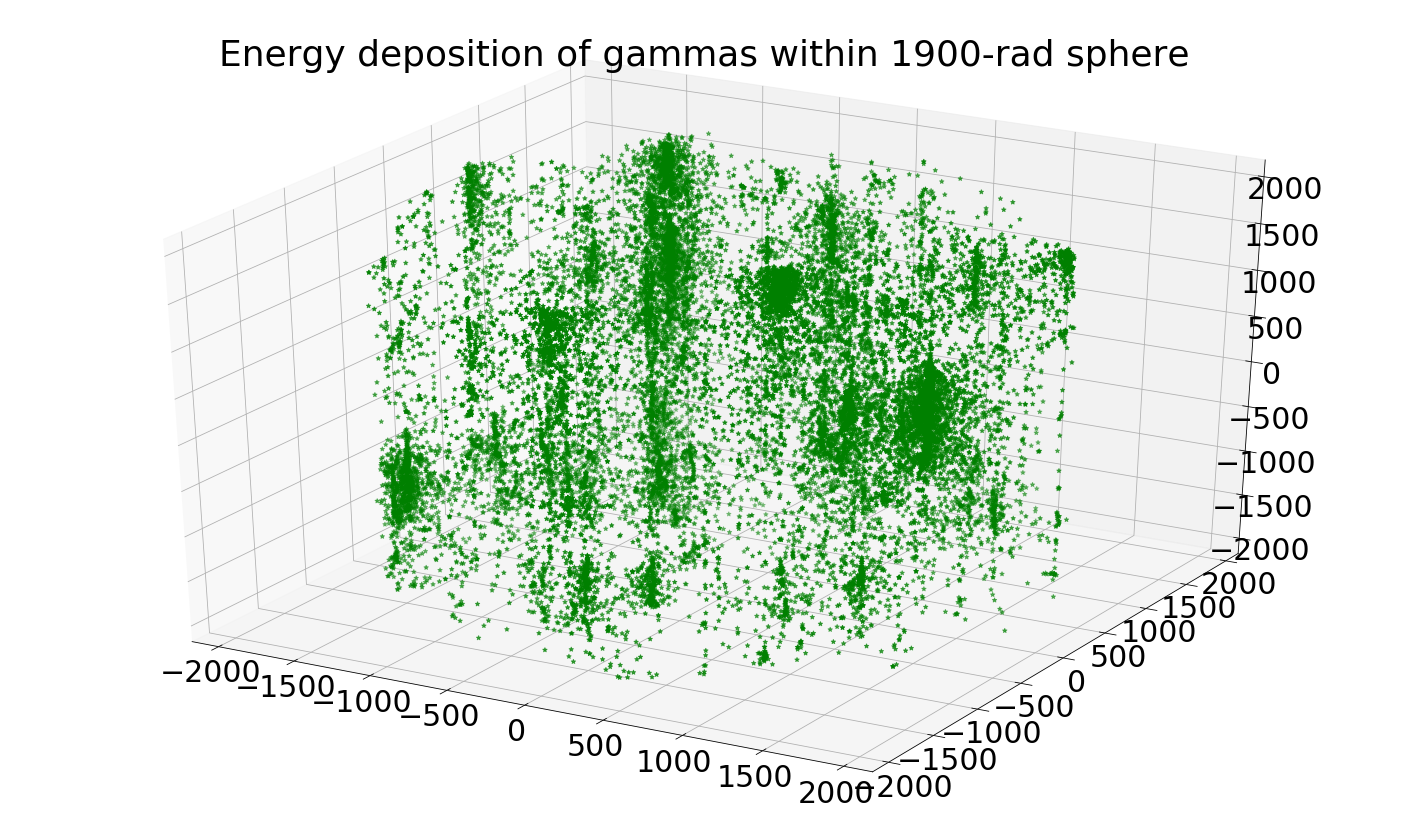

In [57]:
strange_gamma = gamma_dep[gamma_dep.max_coord < 1900]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(strange_gamma.x, strange_gamma.y, strange_gamma.z, c='g', marker='*')
plt.title("Energy deposition of gammas within 1900-rad sphere")
plt.show()


These `strange gammas` that deposit energy not over the volume border, seem to follow vertical trajectory like the muons projected in the LAr. 
Then, their deposition could occur in correspondance of the muon passage (**?!**).

We try to observe a specific event among these `stranges`. We select the event 55 because it has the largest number of energy depositions by gammas (more than 2000).

### Event 55
In the following figure, we draw the muon trajectory (*red line*) and the depositions by gammas (*green points*). The spread of gammas starts from the muon trajectory and propagates isotropically in all the directions.

/home/luigi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


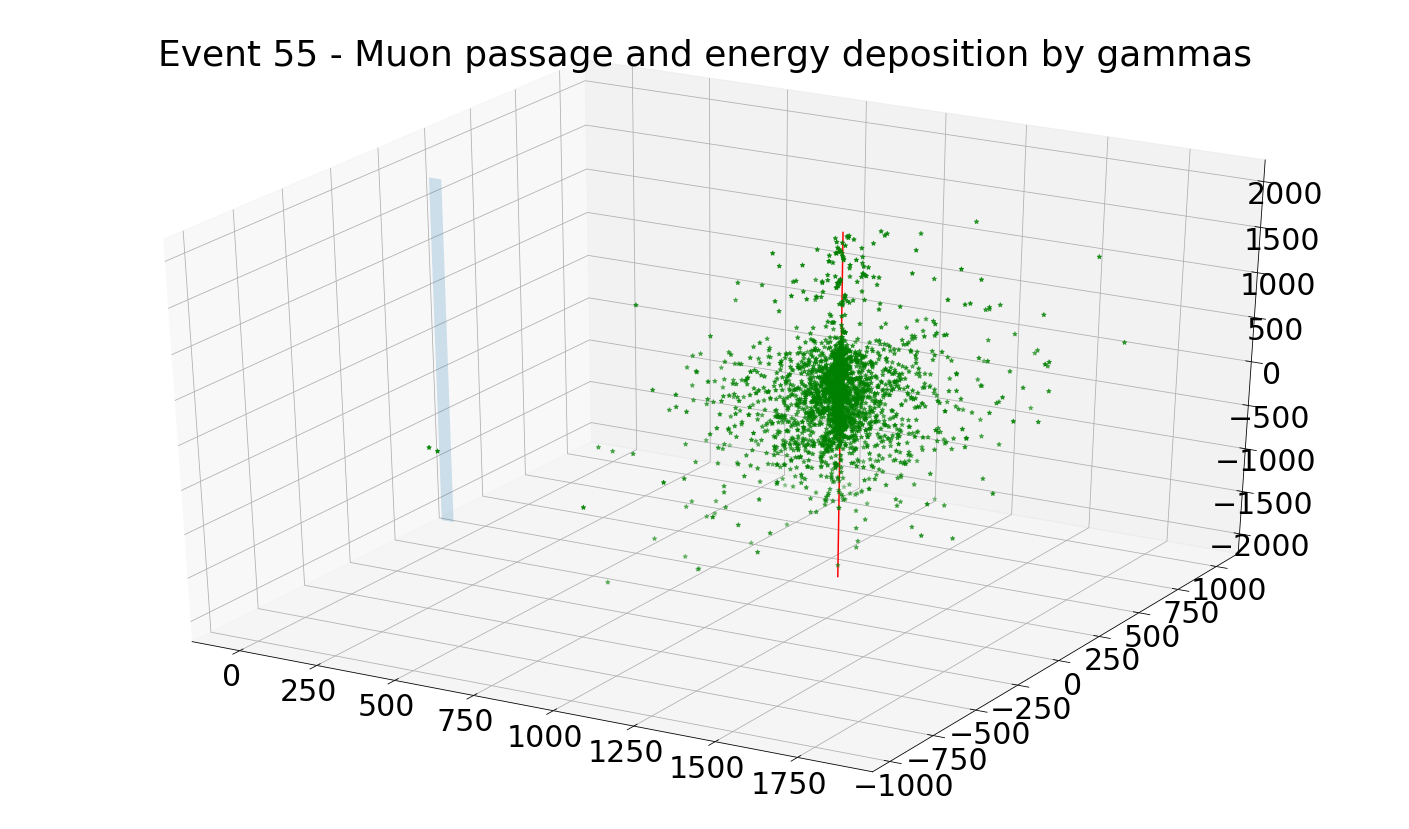

In [92]:
e55 = strange_gamma[strange_gamma.eventnumber==55]
muon55 = df[(df.PID==13) & (df.eventnumber==55)].sort_values("time")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(e55.x, e55.y, e55.z, c='g', marker='*')
ax.plot(muon55.x, muon55.y, muon55.z, c='r')
plt.title("Event 55 - Muon passage and energy deposition by gammas")

# Cylinder
x=np.linspace(-1950, 1950, 100)
z=np.linspace(-1950, 1950, 100)
Xc, Zc=np.meshgrid(x, z)
Yc = np.sqrt(1950-Xc**2)

# Draw parameters
rstride = 20
cstride = 10
ax.plot_surface(Xc, Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride)
#ax.plot_surface(Xc, -Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride)

plt.show()

This kind of isotropical diffusion is mostly forced by the **eBrem** process.
However, the deposited energy is only a few keV (*3.21 keV*).

In [78]:
print(e55.groupby("creatorprocess").PID.count())
print()
print(e55.energydeposition.describe())

creatorprocess
annihil           373
eBrem            2246
photonNuclear       3
Name: PID, dtype: int64

count    2622.000000
mean        3.178501
std         0.295579
min         0.003816
25%         3.206300
50%         3.206300
75%         3.206300
max         3.206300
Name: energydeposition, dtype: float64


In [83]:
event55 = df[df.eventnumber==55].sort_values("time")
event55

,PID,tracknumber,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,parentnucleusPID,creatorprocess
177258,22,765,753,0.000000,0.0000,5.350900e+01,1218.30,127.9610,1950.0000,55,0,eBrem
193929,-11,754,543,396.788000,9109.3100,5.350950e+01,1217.29,126.0150,1950.0000,55,0,conv
194090,11,9234,9152,7.858240,0.0000,5.350960e+01,1218.23,125.8070,1948.7700,55,0,phot
194003,22,9152,754,3.206300,0.0000,5.350960e+01,1218.21,125.8070,1948.7900,55,0,eBrem
176846,11,753,543,424.317000,27066.6000,5.351170e+01,1218.68,127.6420,1950.0000,55,0,conv
176875,11,769,753,494.812000,14638.5000,5.351360e+01,1218.02,127.7650,1950.0000,55,0,eIoni
177305,11,1004,765,255.277000,11431.2000,5.351480e+01,1218.35,128.0370,1948.4400,55,0,conv
177322,11,1027,1004,339.168000,71.2279,5.351640e+01,1218.59,127.9260,1946.7000,55,0,eIoni
177323,11,1027,1004,71.227900,0.0000,5.351660e+01,1218.91,128.0660,1946.5100,55,0,eIoni
193905,-11,1005,765,1186.290000,6270.4400,5.352760e+01,1218.35,128.0370,1948.4400,55,0,conv
